# Ormat Technologies Inc.

Vincent Salinas <br>
Computer Science <br>
UCSD <br>

## Modules

In [346]:
# Imports
from tkinter import *
import matplotlib.pyplot as plt

from scipy import stats
from math import sqrt

# Standard libraries used with Python
import numpy as np
import pandas as pd

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Import dataset


In [347]:
# The code below uses pandas library to import the dataset. This provides data manipulation and analyzation.
df = pd.read_csv('SH temp.csv')
df.columns = ['time','temp']
df # Display dataset

,time,temp
0,1/1/18 0:01,4.120663
1,1/1/18 0:30,4.151361
2,1/1/18 1:00,4.220182
3,1/1/18 1:30,4.309535
4,1/1/18 2:00,4.398887
5,1/1/18 2:30,4.367211
6,1/1/18 3:00,4.325695
7,1/1/18 3:30,4.279080
8,1/1/18 4:00,4.212034
9,1/1/18 4:30,4.144987


## Data Cleaning


In [348]:
# To analyze the dataset, exclude any "n/a" elements. Our data cannot be analyzed correctly 
# with missing data. Excluding them insures no erroneous data is included, while maintaining
# all significant data.
df = df.dropna()
df.isnull().values.any()

False

In [349]:
df['time'].isnull().values.any()

False

In [350]:
df['temp'].isnull().values.any()

False

In [351]:
time = []
for x in range(len(df['temp'])):
    time.append(x)

## Data Visualization
The code below allows us to visualize our dataset. From here we can develop hypotheses and make predictions
as to what might be causing temparture spikes.

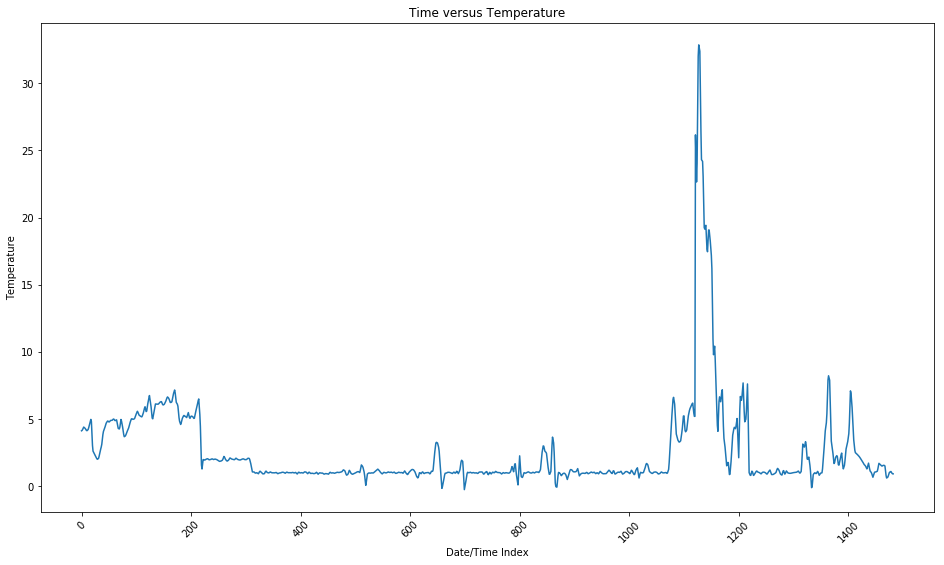

In [352]:
plt.plot(time,df['temp'])
plt.xticks(rotation=45)
plt.title('Time versus Temperature')
plt.xlabel('Date/Time Index')
plt.ylabel('Temperature')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

To better work with the data, the provided dates/times have been converted to indexes. This
makes it easier to read in the plot above. Python widgets is used later to convert indexes back to date/time.

In [363]:
output_file = open('temperature_analysis.txt', 'w')

In [354]:
list1 = df['time'].tolist() # list of dates/times
list2 = df['temp'].tolist() # list of temperatures

In [355]:
# To determine difference bound (later explained below), the function "bounded" returns 
# temperature values between 0.0 and 2.5 inclusive.
def bounded(x):
    if x >= 0.0 and x <= 2.5:
        return(x)

df_temp = df['temp'].apply(bounded)
df_temp = df_temp.dropna()

In [356]:
# Calculates the temperature difference one point to the very next point in the provided dataset,
# which is then saved to a list (difference_list) as well as the respective dates (difference_dates).

difference_list = []   # list of differences between pairs of points after the other
difference_lista = []  # magnitude of difference list above
difference_dates = []  # dates for each respective difference taken
for i in range(len(list2)):
    if ((i) - (i-1)) > 0:
        d = list2[i] - list2[i-1]
        difference_lista.append(abs(d))
        difference_list.append(d)
        difference_dates.append(((i-1),i))

difference_list.pop(0)
difference_dates.pop(0)
difference_lista.pop(0)

df = pd.DataFrame(difference_list)
df.columns = ['temp_difference']

In [332]:
# The code below uses "ipywidgets" library. This allows us to use a GUI to manipulate and analyze data as we want much
# more easily than manually inputting test data.

def get_indeces():
    start = e1.get() + " " + e2.get()
    stop =  e3.get() + " " + e4.get()
    ind1 = list1.index(start)
    ind2 = list1.index(stop)
    return(ind1, ind2)

# Calculates the average temperature from a designated "start" and "stop" date, including
# time in hours:minutes.
def show_mean_temp():
    ind1, ind2 = get_indeces()
    total = sum(list2[ind1:ind2])
    mean = total / len(list2[ind1:ind2])
    print("Average temp: %s" % mean)

# Determine maximum tempurature in designated time span (from "start" to "stop" date, including hours:minutes)
def show_max_temp():
    ind1, ind2 = get_indeces()
    print("Max temp: %s" % max(list2[ind1:ind2]))

# Show current temperature at desiganted "index".
def show_temp():
    print("Current temp: %s" % list2[int(e5.get())])
    
# Show current date at designated "index".
def show_date():
    print("Date: %s" % list1[int(e5.get())])
    
# Shows the current "Start Date" and "End Date" as well as their respective times (h:m)    
def show_entry_fields():
    print("Start Date: %s\nStart Time: %s\nEnd Date: %s\nEnd Time: %s" % (e1.get(), e2.get(), e3.get(), e4.get()))

# Shows date of specified heat
def show_date_of_specified_heat():
    ind1, ind2 = get_indeces()
    maximum = max(list2[ind1:ind2])
    index = list2.index(maximum)
    print("Date: %s Index: %s" % (list1[int(index)], index))

    
    
master = Tk()
Label(master, text="Start Date").grid(row=0, column=0)
Label(master, text="Time").grid(row=0, column=2)
Label(master, text="End Date").grid(row=1, column=0)
Label(master, text="Time").grid(row=1, column=2)
Label(master, text="Index").grid(row=2, column=0)
Label(master, text="Heat").grid(row=2, column=2)

e1 = Entry(master) # start date entry
e2 = Entry(master) # start time entry
e3 = Entry(master) # end date entry 
e4 = Entry(master) # end time entry
e5 = Entry(master) # time index
e6 = Entry(master) # return date of specified heat

# defaults values 
e1.insert(10,"1/1/18")
e2.insert(10,"0:30")
e3.insert(10,"1/31/18")
e4.insert(10,"23:59")
e5.insert(10,"0")
e6.insert(10,"0.0")

e1.grid(row=0, column=1) # start date
e2.grid(row=0, column=3) # start time
e3.grid(row=1, column=1) # end date
e4.grid(row=1, column=3) # end time
e5.grid(row=2, column=1) # time index
e6.grid(row=2, column=3) # heat value -> Date

Button(master, text='Quit', command=master.quit).grid(row=5, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=5, column=1, sticky=W, pady=4)
Button(master, text='Mean', command=show_mean_temp).grid(row=5, column=2, sticky=W, pady=4)
Button(master, text='Temp', command=show_temp).grid(row=5, column=3, sticky=W, pady=4)
Button(master, text='Date/Time', command=show_date).grid(row=6, column=1, sticky=W, pady=4)
Button(master, text='Max', command=show_max_temp).grid(row=6, column=2, sticky=W, pady=4)
Button(master, text='RTD', command=show_date_of_specified_heat).grid(row=6, column=3, sticky=W, pady=4)

mainloop( )

## Data Analysis

### Goal:
Want to provide alert if a reading/sample is abnormal.

### Methodology:
To analyze the dataset and provide an alert if a reading or sample is "abnormal", we can first designate what should be considered "normal". The method indicated here assumes the dataset provided is controlled by a temperature control device, which keeps a record of the changing temperatures of designated machinery. The next assumption assumes these machines must be maintained at a certain temperature threshold in order to perform at optimum efficiency. This temperature threshold will allow us to come up with a "difference bound" that will help indicate the direction and any abnormalities from one reading to the next. 

### Formulation:
difference_bound = the average temperature difference within specified temperature threshold <br>
x = denotes the difference from one respective temperature to the very next temperature from the original dataset

- if x > difference_bound --> Alert! Abnormal reading detected.
- if x < difference_bound --> Increase detected (not abnormal).
- if x < 0                --> Decrease detected.
- else                    --> No change detected.

### Implementation:
As an example, we can look at the plot diagram again and specify a threshold under the assumption that the designated machinery performs most efficiently within these bounds. Here, we designate the optimal threshold temperatures to be within 0 to 2.5 (indicated within the red horizontal lines below):

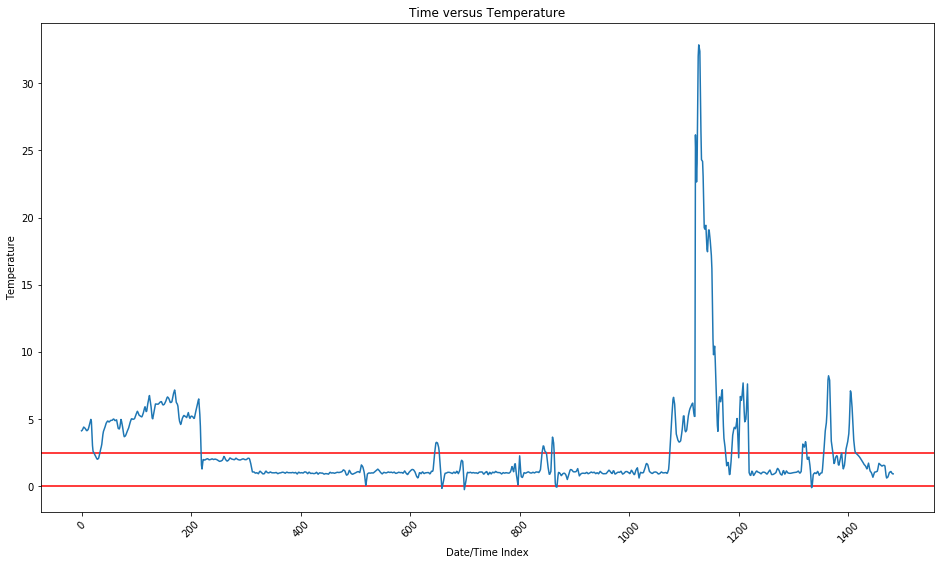

In [357]:
fig

To determine our "difference bound", we take the differences from one point to the next and save these values to a list. Finding the mean value of this list gives our difference bound. The following shows a sample of the first 5 values from the list:

In [358]:
df.head(5)

,temp_difference
0,0.030698
1,0.068821
2,0.089353
3,0.089352
4,-0.031676


The next value is the mean from all the values in the list, which gives us our difference bound:

In [364]:
difference_bound = sum(difference_lista) / len(difference_lista)
print("Difference bound: %s" % difference_bound)

Difference bound: 0.17282080634278033


The following code applies the method illustrated above, and saves the data to a text file called "temperature_analysis.txt".  The code goes from one point to the next point in the original temperatures dataset, and determines the relationship between the temperature difference and the difference bound. Dates and times are also provided for each respective temperature difference.

- if the temperature difference is greater than the difference bound, an abnormal temperature increase is detected.
- if the difference is less than the difference bound, only an increase is detected (but not abnormal)
- if the difference is less than 0, a decrease is detected
- else, there is no change detected


In [365]:
index = 0
count_abnormal = 0
for i in difference_list:
    if i > difference_bound:
        print("[Alert] Abnormal reading: %1.18f - Date/Time: %s to %s" % (i, list1[list5[index][0]], list1[list5[index][1]]))
        output_file.write("[Alert] Abnormal reading: %1.18f - Date/Time: %s to %s\n" % (i, list1[list5[index][0]], list1[list5[index][1]]))
        count_abnormal = count_abnormal + 1
    elif i < difference_bound and i > 0:
        print("Increase detected: %1.18f - Date/Time: %s to %s" % (i, list1[list5[index][0]], list1[list5[index][1]]))
        output_file.write("Increase detected: %1.18f - Date/Time: %s to %s\n" % (i, list1[list5[index][0]], list1[list5[index][1]]))
    elif i < 0:
        print("Decrease detected: %1.18f - Date/Time: %s to %s" % (i, list1[list5[index][0]], list1[list5[index][1]]))
        output_file.write("Decrease detected: %1.18f - Date/Time: %s to %s\n" % (i, list1[list5[index][0]], list1[list5[index][1]]))
    else:
        print("No change detected: %1.18f - Date/Time: %s to %s" % (i, list1[list5[index][0]], list1[list5[index][1]]))
        output_file.write("No change detected: %1.18f - Date/Time: %s to %s\n" % (i, list1[list5[index][0]], list1[list5[index][1]]))
    index = index + 1

output_file.write("\n\nNumber of abnormal readings detected: %s" % count_abnormal)

Increase detected: 0.030698000000000114 - Date/Time: 1/1/18 0:01 to 1/1/18 0:30
Increase detected: 0.068821000000000687 - Date/Time: 1/1/18 0:30 to 1/1/18 1:00
Increase detected: 0.089352999999999128 - Date/Time: 1/1/18 1:00 to 1/1/18 1:30
Increase detected: 0.089352000000000764 - Date/Time: 1/1/18 1:30 to 1/1/18 2:00
Decrease detected: -0.031676000000000037 - Date/Time: 1/1/18 2:00 to 1/1/18 2:30
Decrease detected: -0.041516000000000552 - Date/Time: 1/1/18 2:30 to 1/1/18 3:00
Decrease detected: -0.046614999999999185 - Date/Time: 1/1/18 3:00 to 1/1/18 3:30
Decrease detected: -0.067046000000000383 - Date/Time: 1/1/18 3:30 to 1/1/18 4:00
Decrease detected: -0.067046999999999635 - Date/Time: 1/1/18 4:00 to 1/1/18 4:30
Decrease detected: -0.015548000000000783 - Date/Time: 1/1/18 4:30 to 1/1/18 5:00
Increase detected: 0.041405000000001024 - Date/Time: 1/1/18 5:00 to 1/1/18 5:30
Increase detected: 0.041405999999999388 - Date/Time: 1/1/18 5:30 to 1/1/18 6:00
Increase detected: 0.1261169999999

43

In [366]:
# Display number of abnormal readings detected.
print("Number of abnormal readings detected: %s" % count_abnormal)

Number of abnormal readings detected: 153


In [367]:
output_file.close()

### Conclusion: 
From the analysis above, there were 153 instances where the temperature change from one recording to the next indicated an abnormal temperature increase (also viewable from the temperature_analysis.txt file). Reasons as to "why" these abnormal temperature increases might have occurred could be due to a number of things, such as the metals and materials the machines used to maintain the temperatures are made of, or scheduling of routine and preventative maintenance, etc.

Given the dataset with designated dates and temperatures alone, I feel this is the best approach to solving the problem of forecasting abnormal temperature readings from a point to point basis. Again, many assumptions were made in the methodology applied above. Assuming the machines generating the temperatures in the provided dataset must be maintained within a certain threshold to optimize efficiency and performance, specifying such a threshold was key to finding a "difference bound" that could be used to indicate any abnormal temperature increases. 


## Why Python?

In terms of structure and syntax, Python is not only free, intuitive, and extensible but also an exceedingly powerful general-purpose programming language.<br>
<br>
Python was explicitly designed (a) so code written in Python would be easy for humans to read, and (b) to minimize the amount of time required to write code. According to a recent study, 80% of the top 10 CS programs in the country use Python in their intro to computer science classes. Python also provides a number of imports and libraries that make manipulation and analyzing datasets relatively easy, which are also free and updated frequently. The following are just a few aspects of why Python is excellent for data analysis:<br> 

Usability: <br>
Coding and debugging is easier to do in Python, mainly because of the "nice" syntax. <br>
<br>
Flexibility: <br>
Python is flexible for doing new things. Developers can also use it for scripting a website or other applications. <br>
<br>
Ease of Learning:<br>
Python's focus on readability and simplicity makes that its learning curve is relatively low and gradual.<br>

## Modules

Pandas: <br>
Pandas is the Python Data Analysis Library, used for everything from importing data from Excel spreadsheets to processing sets for time-series analysis. Pandas puts pretty much every common data munging tool at your fingertips. This means that basic cleanup and some advanced manipulation can be performed with Pandas’ powerful dataframes.<br>

Numpy: <br>
Pandas is built on top of NumPy, one of the earliest libraries behind Python. NumPy’s functions are exposed in Pandas for advanced numeric analysis.<br>

Matplotlib: <br>
Plotting is an essential component of data analysis. Matplotlib uses simple plots to understand complex data sets and to help others understand them. I can be used in in conjunction with Pandas library to make bar charts (including histograms), line plots (including time series), scatter plots, and desnity plots. <br>

ipywidgets: <br>
Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc. You can use widgets to build interactive GUIs for your notebooks. You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.
